In [78]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Medical%20Cost%20Personal%20Datasets/insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1211,39,male,34.10,2,no,southeast,23563.01618
221,53,female,33.25,0,no,northeast,10564.88450
475,61,male,28.31,1,yes,northwest,28868.66390
303,28,female,33.00,2,no,southeast,4349.46200
38,35,male,36.67,1,yes,northeast,39774.27630
1160,43,female,34.58,1,no,northwest,7727.25320
193,56,female,26.60,1,no,northwest,12044.34200
41,31,female,36.63,2,no,southeast,4949.75870
1285,47,female,24.32,0,no,northeast,8534.67180
271,50,male,34.20,2,yes,southwest,42856.83800


<ipython-input-81-2baef53fda93>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


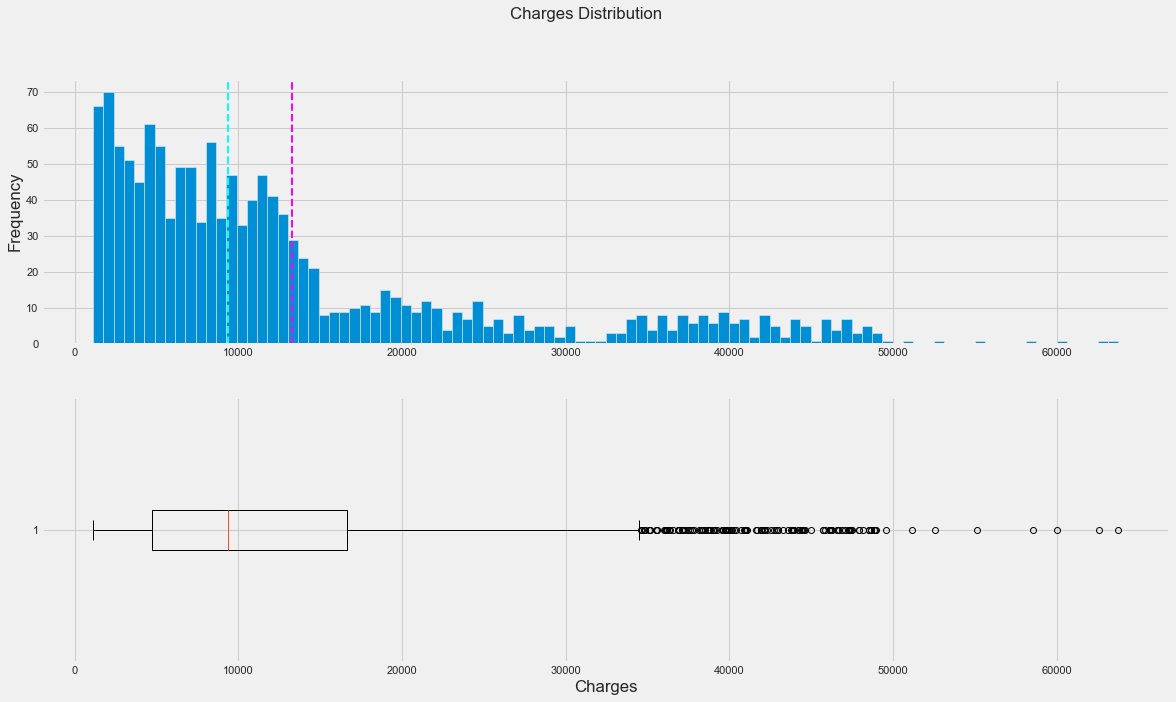

In [81]:
# distribution of label

# Get the label column
label = df['charges']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (18,10))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Charges')

# Add a title to the Figure
fig.suptitle('Charges Distribution')

# Show the figure
fig.show()

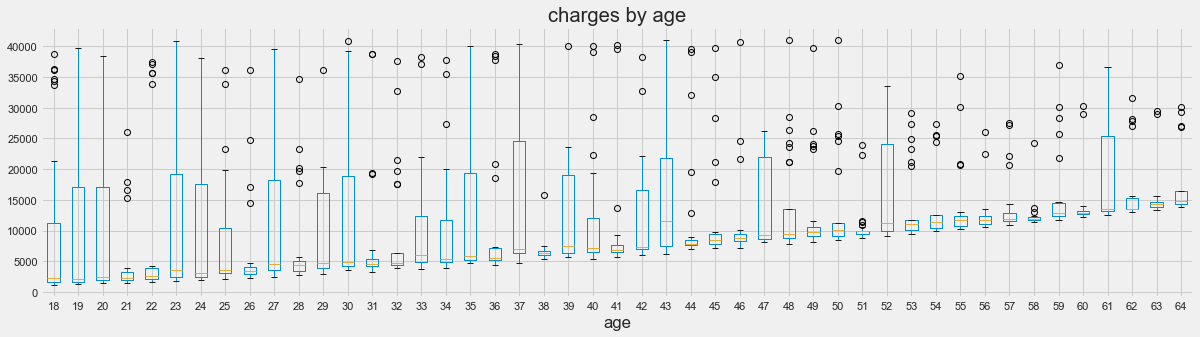

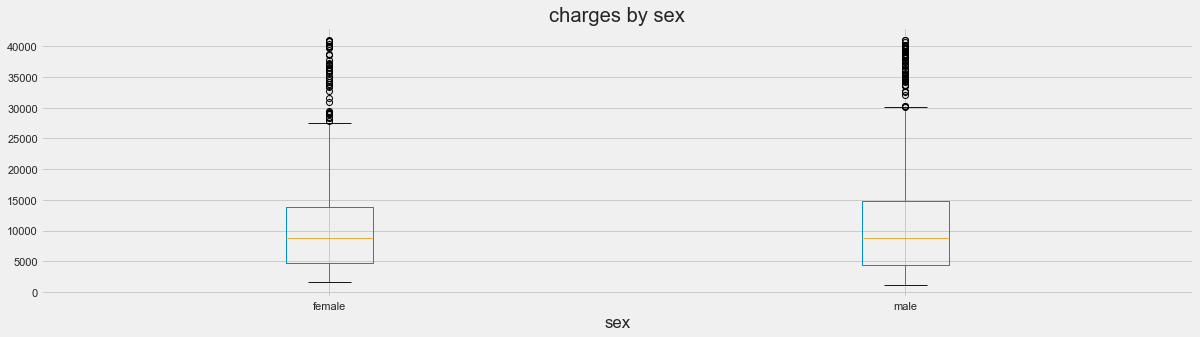

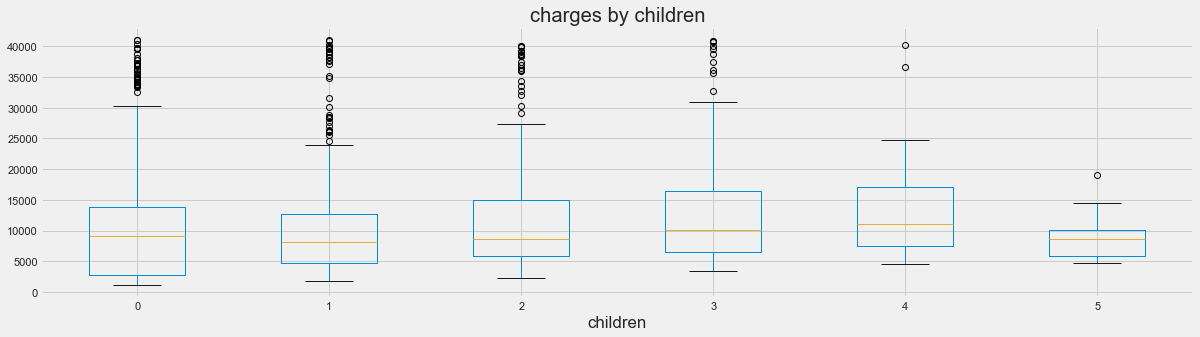

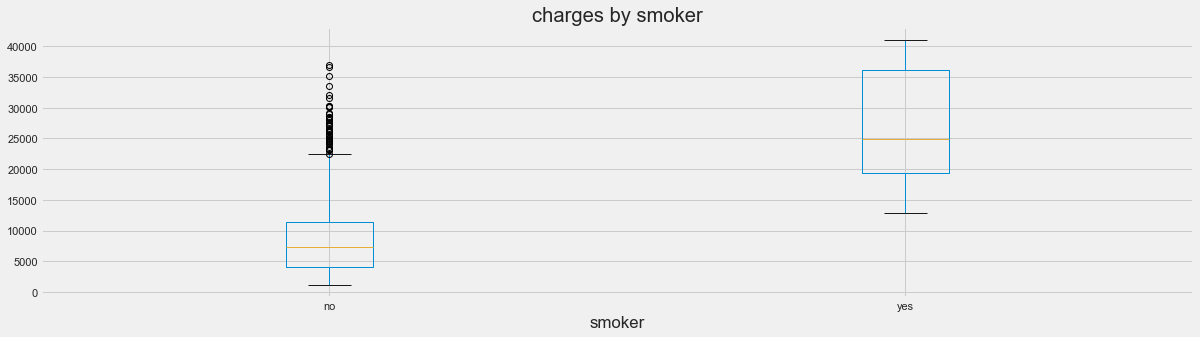

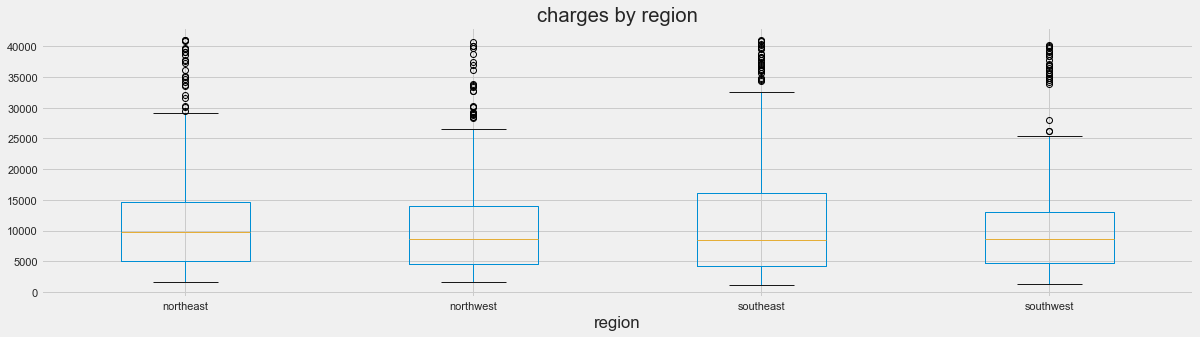

In [82]:
cat_features = ['age','sex','children','smoker','region']
for col in cat_features:
    df_outliers=df.charges.quantile(.95)
    df_outliers_removed = df[df.charges <= df_outliers]
    df_outliers_removed.boxplot('charges',col,figsize=(20,5))
    plt.suptitle('')
    plt.title('charges by '+col)
    plt.show();

In [84]:
df = pd.get_dummies(df)
# Separate features and labels
X, y = df.drop('charges',1).values, df['charges'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[19.    27.9    0.     1.     0.     0.     1.     0.     0.     0.
   1.   ]
 [18.    33.77   1.     0.     1.     1.     0.     0.     0.     1.
   0.   ]
 [28.    33.     3.     0.     1.     1.     0.     0.     0.     1.
   0.   ]
 [33.    22.705  0.     0.     1.     1.     0.     0.     1.     0.
   0.   ]
 [32.    28.88   0.     0.     1.     1.     0.     0.     1.     0.
   0.   ]
 [31.    25.74   0.     1.     0.     1.     0.     0.     0.     1.
   0.   ]
 [46.    33.44   1.     1.     0.     1.     0.     0.     0.     1.
   0.   ]
 [37.    27.74   3.     1.     0.     1.     0.     0.     1.     0.
   0.   ]
 [37.    29.83   2.     0.     1.     1.     0.     1.     0.     0.
   0.   ]
 [60.    25.84   0.     1.     0.     1.     0.     0.     1.     0.
   0.   ]]

Labels:
[16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]


In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 936 rows
Test Set: 402 rows


MSE: 33330370.656433728
RMSE: 5773.246110849054
R2: 0.7909921461545824


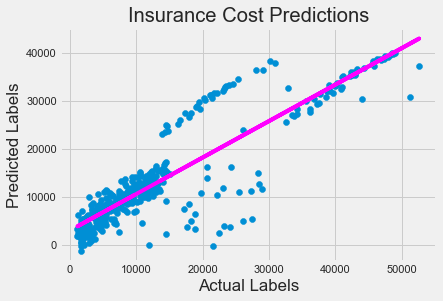

In [86]:

model = LinearRegression().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 33345052.25055138
RMSE: 5774.517490713089
R2: 0.7909000809174691


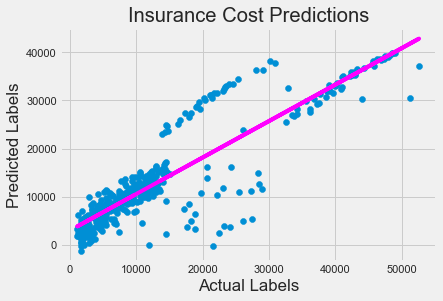

In [88]:
model = Lasso().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 42925650.74333195
RMSE: 6551.766993974369
R2: 0.7308221312849412


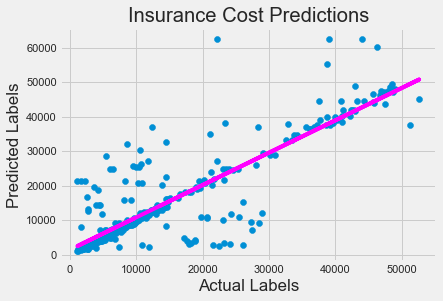

In [89]:

model = DecisionTreeRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 21447227.502899345
RMSE: 4631.115146797728
R2: 0.8655088766482071


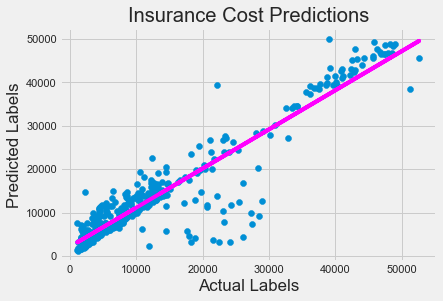

In [90]:
# Train the model
model = RandomForestRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 17905071.30935178
RMSE: 4231.438444471546
R2: 0.887721004788934


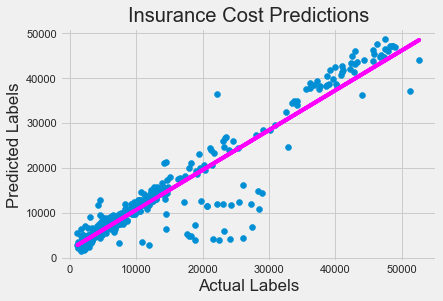

In [91]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 17237357.41633643
RMSE: 4151.789664269666
R2: 0.8919081003721321


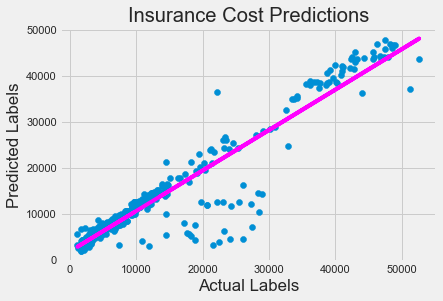

In [92]:
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
 'n_estimators' : [20, 50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Cost Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()